In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Bank_Clean.csv')

In [3]:
df

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y,age_group,pdays_group
0,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,no,55-64,Not Previously Contacted
1,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no,35-44,Not Previously Contacted
2,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no,25-34,Not Previously Contacted
3,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no,35-44,Not Previously Contacted
4,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,0,no,25-34,Not Previously Contacted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43188,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,0,yes,45-54,Not Previously Contacted
43189,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,0,yes,65+,Not Previously Contacted
43190,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,3,yes,65+,144 to 282 days
43191,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,0,no,55-64,Not Previously Contacted


In [4]:
df_desc = df.describe()

df_desc.loc["IQR"] = df_desc.loc['75%'] - df_desc.loc['25%']

df_desc.loc["Range"] = df_desc.loc['max'] - df_desc.loc['min']

df_desc.loc["Variance"] = df_desc.loc["std"] ** 2

df_desc.loc['High_Out_IQR'] = df_desc.loc['75%'] + (df_desc.loc["IQR"] * 1.5)

df_desc.loc['Low_Out_IQR'] = df_desc.loc['25%'] - (df_desc.loc["IQR"] * 1.5)

df_desc

,balance,day,duration,campaign,previous
count,4.319300e+04,43193.000000,43193.000000,43193.000000,43193.000000
mean,1.354027e+03,15.809414,258.323409,2.758178,0.584863
std,3.042104e+03,8.305970,258.162006,3.063987,2.332672
min,-8.019000e+03,1.000000,0.000000,1.000000,0.000000
25%,7.100000e+01,8.000000,103.000000,1.000000,0.000000
50%,4.420000e+02,16.000000,180.000000,2.000000,0.000000
75%,1.412000e+03,21.000000,318.000000,3.000000,0.000000
max,1.021270e+05,31.000000,4918.000000,58.000000,275.000000
IQR,1.341000e+03,13.000000,215.000000,2.000000,0.000000
Range,1.101460e+05,30.000000,4918.000000,57.000000,275.000000


## Percentage of Client Open a Deposit

In [5]:
df['Open_Deposit'] = df['y']

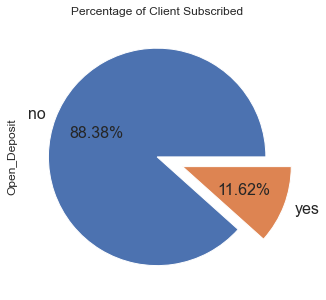

In [6]:
plt.figure(figsize=(5,5))
df['Open_Deposit'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%',  fontsize=16)
plt.title('Percentage of Client Subscribed')
plt.show()

- Dapat dilihat bahwa dataset ini merupakan dataset yang tidak balance.

## Conversion by Categorical Column

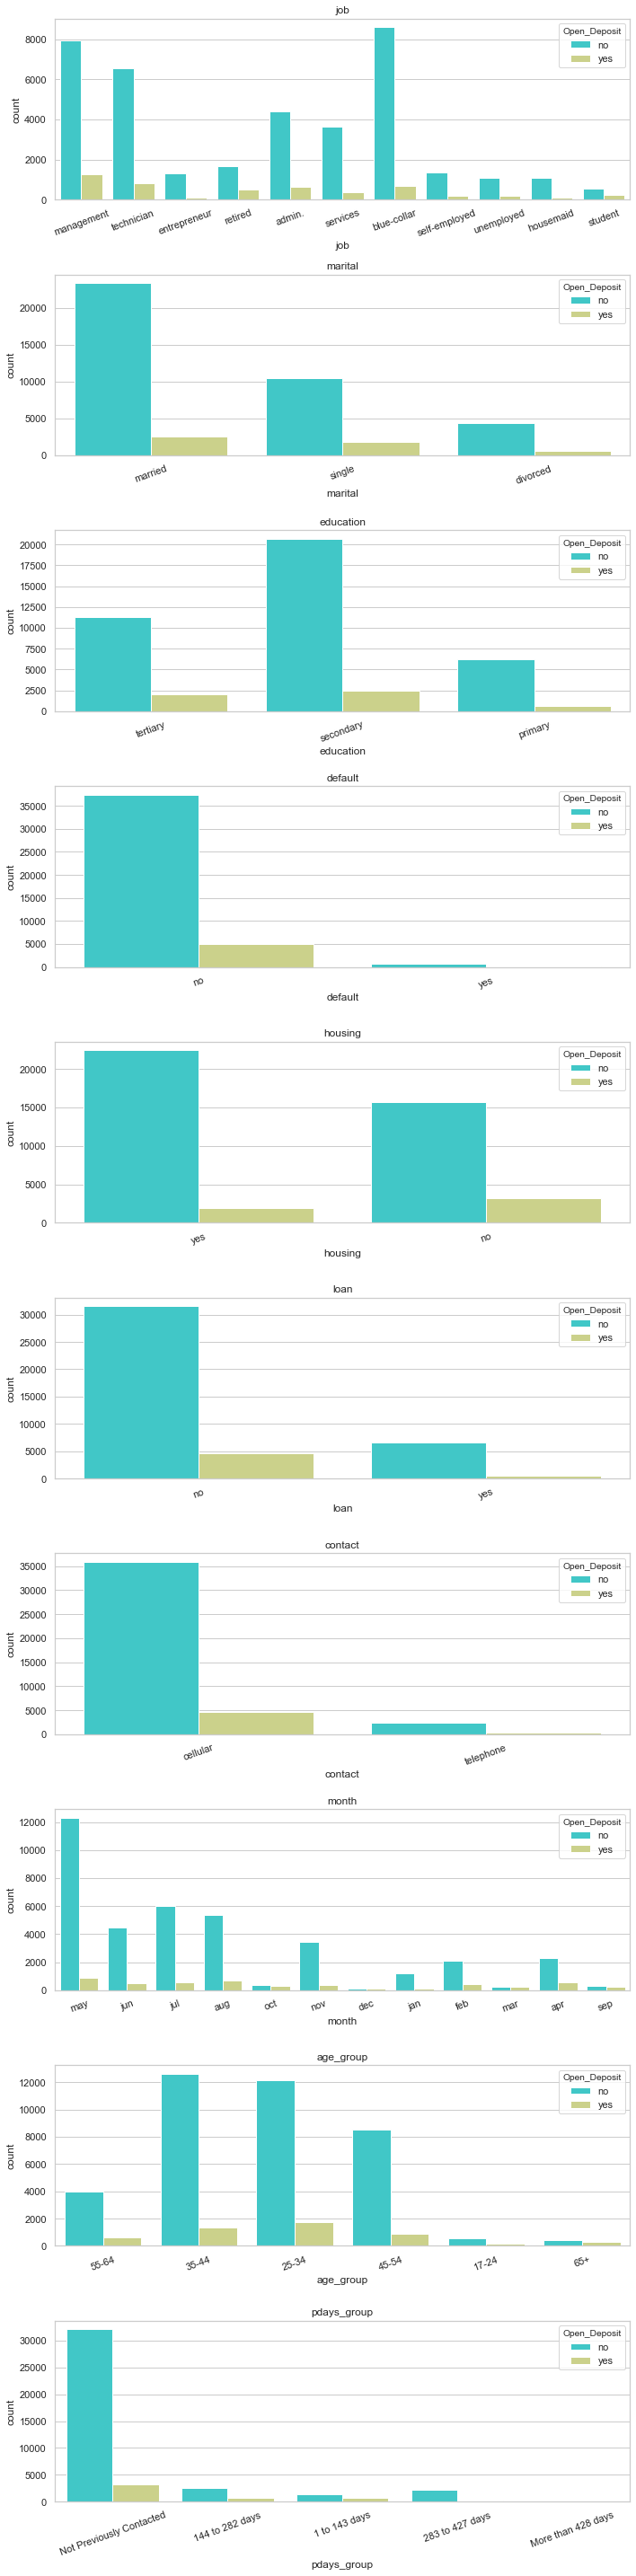

In [7]:
sns.set_style('whitegrid')
obj_col = ['job','marital','education','default','housing','loan','contact','month','age_group','pdays_group']

fig, ax = plt.subplots(10, 1, figsize=(10,40))
for i, obj in enumerate(obj_col):
    sns.countplot(obj, data=df, hue='Open_Deposit', ax=ax[i], palette='rainbow')

    ax[i].tick_params(axis='x', rotation=20)
    ax[i].set_title(obj)
    plt.tight_layout()

- Pemasaran yang dilakukan oleh bank cenderung ingin mendapatkan customer baru ketimbang mempertahankan customer lama, yang dapat dilihat dari count plot pdaysgroup, bahwa mayoritas dari customer merupakan customer yang tidak pernah dikontak sebelumnya.

- Cenderung customer yang sedang tidak memiliki loan(personal & housing) lebih banyak yang membuka deposit ketimbang yang memiliki loan.

- Customer yang tidak memiliki credit in default, lebih banyak yang membuka deposit ketimbang yang memiliki.

In [8]:
df['Deposit'] = df['y'].apply(lambda x : 1 if x == 'yes' else 0 )

<hr>

### Conversion by Campaign

In [9]:
Subscribed_per_campaign = df.groupby(by='campaign')['Deposit'].sum()

In [10]:
Approach_per_campaign = df.groupby(by='campaign')['Deposit'].count()

In [11]:
Subs_per_campaign = pd.concat([Subscribed_per_campaign,Approach_per_campaign],axis=1)

Subs_per_campaign['Percentage_Subscribe'] = round(Subscribed_per_campaign/Approach_per_campaign*100,2)

Subs_per_campaign.columns = ['Subscribed','Approach','Percentage_Subscribe']


In [12]:
Subs_per_campaign

,Subscribed,Approach,Percentage_Subscribe
campaign,,,
1,2431,16742,14.52
2,1323,11938,11.08
3,587,5277,11.12
4,302,3399,8.88
5,136,1703,7.99
6,89,1234,7.21
7,45,696,6.47
8,30,516,5.81
9,20,307,6.51


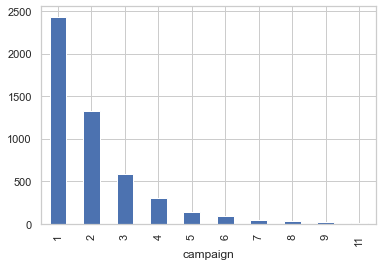

In [13]:
# Sort by Number of Subscribed

Subs_per_campaign.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(10).plot(kind='bar')

- 86% Customer yang membuka deposit hanya dihubungi 1-3x saja.

<hr>

### Conversion by Age Group

In [14]:
Subscribed_per_age = df.groupby(by='age_group')['Deposit'].sum()

In [15]:
Approach_per_age = df.groupby(by='age_group')['Deposit'].count()

In [16]:
Subs_per_age = pd.concat([Subscribed_per_age,Approach_per_age],axis=1)

Subs_per_age['Percentage_Subscribe'] = round(Subscribed_per_age/Approach_per_age*100,2)

Subs_per_age.columns = ['Subscribed','Approach','Percentage_Subscribe']


In [17]:
Subs_per_age

,Subscribed,Approach,Percentage_Subscribe
age_group,,,
17-24,182,729,24.97
25-34,1725,13852,12.45
35-44,1337,13968,9.57
45-54,869,9372,9.27
55-64,599,4549,13.17
65+,309,723,42.74


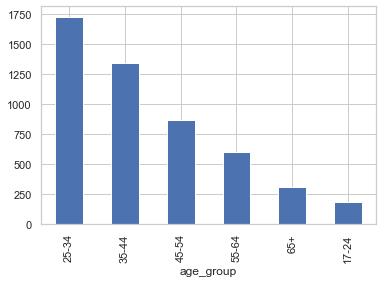

In [18]:
# Sort by Number of Subscribed

Subs_per_age.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(15).plot(kind='bar')

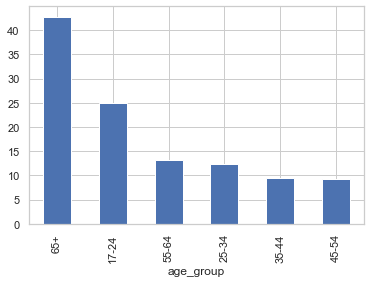

In [19]:
# Sort by Percentage of Subscribed

Subs_per_age.sort_values(by='Percentage_Subscribe', ascending=False)['Percentage_Subscribe'].\
head(10).plot(kind='bar')

- Terlihat fokus dari target market bank merupakan umur 25-34 & 35-44.

- Namun secara presentase, umur 65+ memiliki penyerapan secara presentase paling tinggi sebesar 42.74%.

<hr>

## Conversion by Education

In [20]:
Subscribed_per_education = df.groupby(by='education')['Deposit'].sum()

In [21]:
Approach_per_education = df.groupby(by='education')['Deposit'].count()

In [22]:
Subs_per_education = pd.concat([Subscribed_per_education,Approach_per_education],axis=1)

Subs_per_education['Percentage_Subscribe'] = round(Subscribed_per_education/Approach_per_education*100,2)

Subs_per_education.columns = ['Subscribed','Approach','Percentage_Subscribe']

Subs_per_education


,Subscribed,Approach,Percentage_Subscribe
education,,,
primary,588,6800,8.65
secondary,2441,23131,10.55
tertiary,1992,13262,15.02


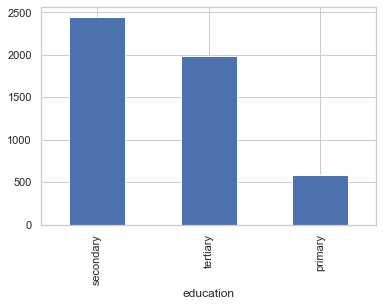

In [23]:
# Sort by Number of Subscribed

Subs_per_education.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(10).plot(kind='bar')

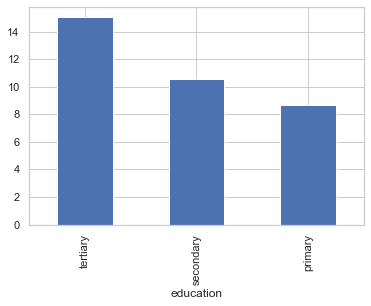

In [24]:
# Sort by Percentage of Subscribed

Subs_per_education.sort_values(by='Percentage_Subscribe', ascending=False)['Percentage_Subscribe'].\
head(10).plot(kind='bar')

- Customer dengan kategori pendidikan secondary merupakan customer yang lebih difokuskan oleh bank, namun secara presentase customer dengan kategori pendidikan tertiary memiliki presentase yang lebih baik.


<hr>

## Conversion by Jobs

In [25]:
Subscribed_per_job = df.groupby(by='job')['Deposit'].sum()

In [26]:
Approach_per_job = df.groupby(by='job')['Deposit'].count()

In [27]:
Subs_per_job = pd.concat([Subscribed_per_job,Approach_per_job],axis=1)

Subs_per_job['Percentage_Subscribe'] = round(Subscribed_per_job/Approach_per_job*100,2)

Subs_per_job.columns = ['Subscribed','Approach','Percentage_Subscribe']

Subs_per_job


,Subscribed,Approach,Percentage_Subscribe
job,,,
admin.,613,5000,12.26
blue-collar,675,9278,7.28
entrepreneur,116,1411,8.22
housemaid,105,1195,8.79
management,1253,9216,13.60
retired,486,2145,22.66
self-employed,182,1540,11.82
services,350,4004,8.74
student,226,775,29.16


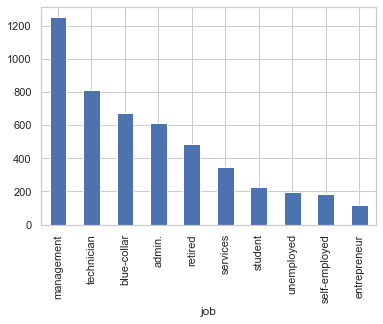

In [28]:
# Sort by Number of Subscribed

Subs_per_job.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(10).plot(kind='bar')

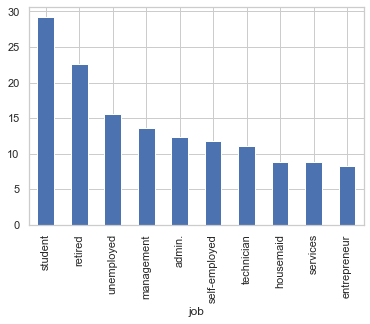

In [29]:
# Sort by Percentage of Subscribed

Subs_per_job.sort_values(by='Percentage_Subscribe', ascending=False)['Percentage_Subscribe'].\
head(10).plot(kind='bar')

- Perusahaan dapat mengkonsiderasi ulang untuk menawarkan produk kepada customer dengan job category blue-collar, dikarenakan besarnya jumlah customer yang ditawarkan dibandingkan dengan yang "membeli" dinilai kurang efektif dibandingkan job category lainnya.

- Serta perusahaan dapat lebih mengkonsiderasi untuk lebih agresif menawarkan produknya kepada job category student dan retired.

<hr>

### Conversion by Month

In [30]:
Subscribed_per_month = df.groupby(by='month')['Deposit'].sum()


In [31]:
Approach_per_month = df.groupby(by='month')['Deposit'].count()

In [32]:
Subs_per_month = pd.concat([Subscribed_per_month,Approach_per_month],axis=1)

Subs_per_month['Percentage_Subscribe'] = round(Subscribed_per_month/Approach_per_month*100,2)

Subs_per_month.columns = ['Subscribed','Approach','Percentage_Subscribe']

Subs_per_month


,Subscribed,Approach,Percentage_Subscribe
month,,,
apr,543,2820,19.26
aug,659,6037,10.92
dec,93,200,46.50
feb,418,2533,16.50
jan,132,1318,10.02
jul,586,6601,8.88
jun,523,4980,10.50
mar,241,448,53.79
may,888,13192,6.73


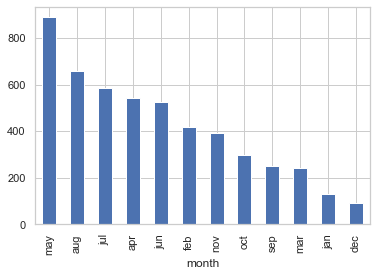

In [33]:
# Sort by Number of Subscribed

Subs_per_month.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(12).plot(kind='bar')

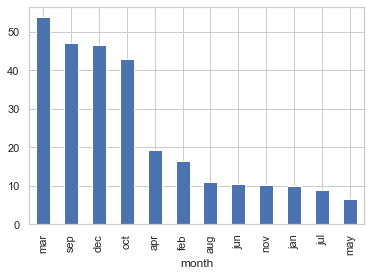

In [34]:
# Sort by Percentage of Subscribed

Subs_per_month.sort_values(by='Percentage_Subscribe', ascending=False)['Percentage_Subscribe'].\
head(12).plot(kind='bar')

- Perusahaan dapat mengkonsiderasi ulang untuk menawarkan produk secara agresif di bulan May, dikarenakan secara presentase paling kecil untuk yang membuka deposit dengan lebih membagi rata customer yang akan di approach pada bulan maret, september, december , dan october dikarenakan memiliki presentase yang besar.

<hr>

### Conversion by Previous

In [35]:
Subscribed_per_previous = df.groupby(by='previous')['Deposit'].sum()


In [36]:
Approach_per_previous = df.groupby(by='previous')['Deposit'].count()

In [37]:
Subs_per_previous = pd.concat([Subscribed_per_previous,Approach_per_previous],axis=1)

Subs_per_previous['Percentage_Subscribe'] = round(Subscribed_per_previous/Approach_per_previous*100,2)

Subs_per_previous.columns = ['Subscribed','Approach','Percentage_Subscribe']

Subs_per_previous = Subs_per_previous.loc[0:6,:]

Subs_per_previous

,Subscribed,Approach,Percentage_Subscribe
previous,,,
0,3222,35281,9.13
1,538,2651,20.29
2,429,2004,21.41
3,284,1096,25.91
4,166,693,23.95
5,115,443,25.96
6,82,268,30.60


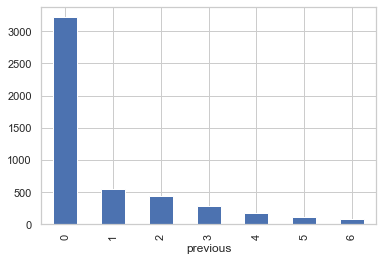

In [38]:
# Sort by Number of Subscribed

Subs_per_previous.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(12).plot(kind='bar')

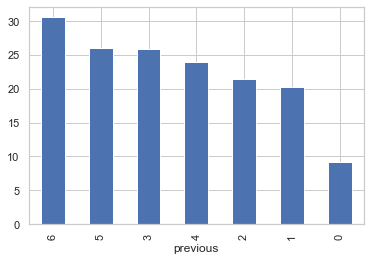

In [39]:
# Sort by Percentage of Subscribed

Subs_per_previous.sort_values(by='Percentage_Subscribe', ascending=False)['Percentage_Subscribe'].\
head(12).plot(kind='bar')

<hr>

### Conversion by Pdays

In [40]:
Subscribed_per_pdays = df.groupby(by='pdays_group')['Deposit'].sum()


In [41]:
Approach_per_pdays = df.groupby(by='pdays_group')['Deposit'].count()

In [42]:
Subs_per_pdays = pd.concat([Subscribed_per_pdays,Approach_per_pdays],axis=1)

Subs_per_pdays['Percentage_Subscribe'] = round(Subscribed_per_pdays/Approach_per_pdays*100,2)

Subs_per_pdays.columns = ['Subscribed','Approach','Percentage_Subscribe']

Subs_per_pdays


,Subscribed,Approach,Percentage_Subscribe
pdays_group,,,
1 to 143 days,732,2090,35.02
144 to 282 days,695,3188,21.80
283 to 427 days,285,2443,11.67
More than 428 days,87,191,45.55
Not Previously Contacted,3222,35281,9.13


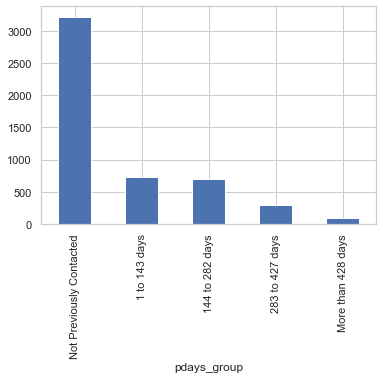

In [43]:
# Sort by Number of Subscribed

Subs_per_pdays.sort_values(by='Subscribed', ascending=False)['Subscribed'].head(12).plot(kind='bar')

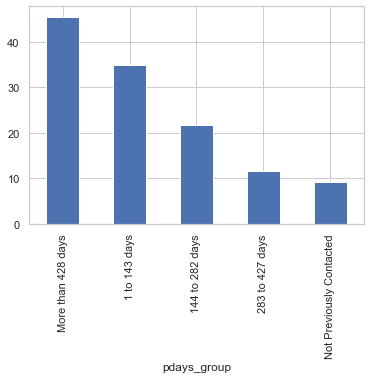

In [44]:
# Sort by Percentage of Subscribed

Subs_per_pdays.sort_values(by='Percentage_Subscribe', ascending=False)['Percentage_Subscribe'].\
head(12).plot(kind='bar')

- Perusahaan dapat mengkonsiderasi untuk lebih agresif dalam menawarkan produk kepada existing customer mereka.

## Pdays vs Previous

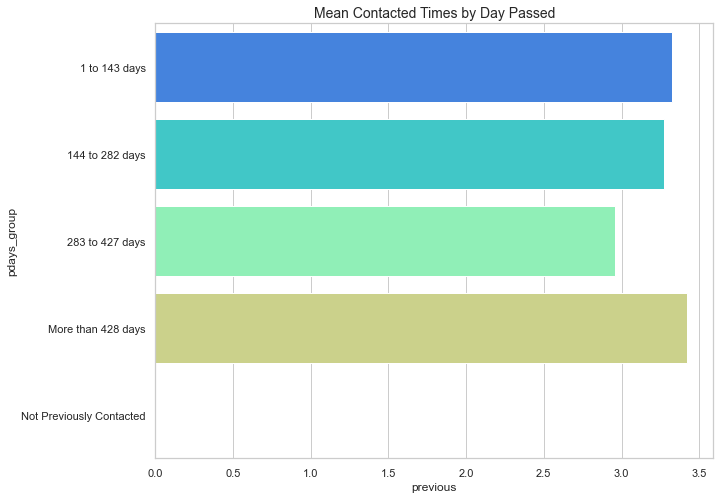

In [45]:
previous_median = df.groupby(['pdays_group'], as_index=False)['previous'].mean()

fig = plt.figure(figsize=(10,8))

sns.barplot(x="previous", y="pdays_group", data=previous_median,
            label="previous", palette='rainbow')

plt.title('Mean Contacted Times by Day Passed', fontsize=14)

plt.show()

- Dalam rangka mendapatkan customer retention, rata-rata perusahaan menghubungi customer tersebut sebanyak 3x.

- Disesuaikan dengan grafik presentase dari data Subs_per_previous, perusahaan dapat mencoba untuk meningkatkan frekuensi dalam menghubungi customer nya sebanyak 5-6x.

### Check for Outlier

In [46]:
numeric = ['balance','day','duration','campaign']

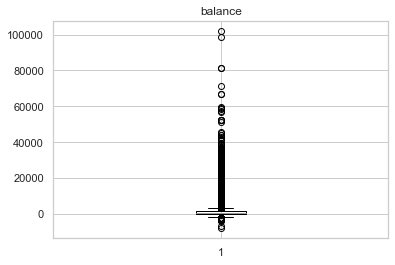

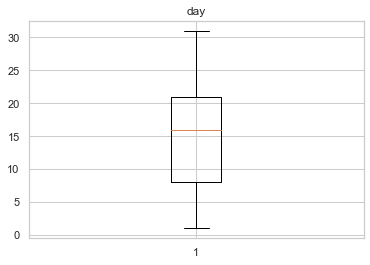

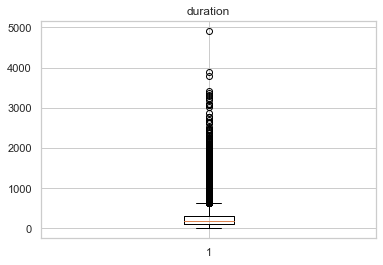

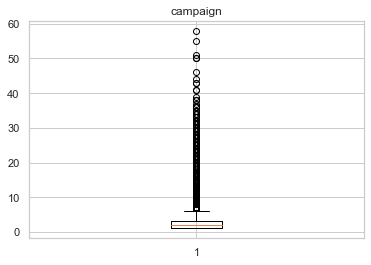

In [47]:
def box_plot(numeric):
    for i in range(len(numeric)):
        plt.boxplot(df[numeric[i]])
        plt.title(numeric[i])
        plt.show()
box_plot(numeric)

### Balance Distribution

In [48]:
# Remove Extreme Value

balance_eda = df[df['balance'].between(df['balance'].quantile(.1), df['balance'].quantile(.9))]

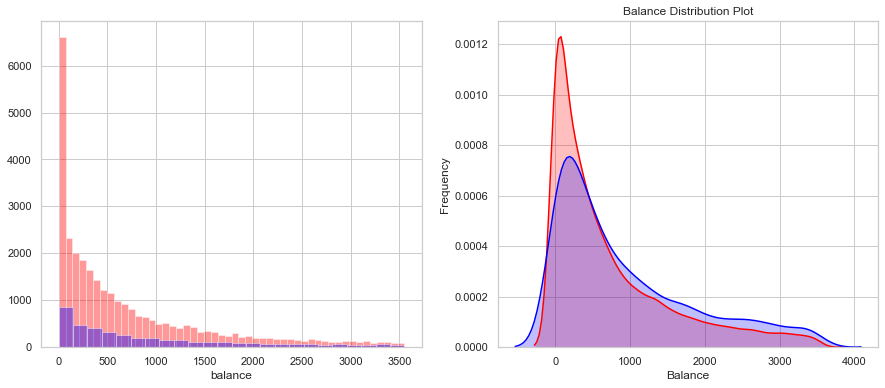

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.distplot(balance_eda[balance_eda['y']== 'no']['balance'], color='red', kde=False, ax=ax[0])
sns.distplot(balance_eda[balance_eda['y']== 'yes']['balance'], color='blue', kde=False, ax=ax[0])
plt.title('Balance Distribution Plot')
plt.xlabel('Balance')
plt.ylabel('Frequency')

sns.distplot(balance_eda[balance_eda['y']== 'no']['balance'], color='red', hist=False,kde_kws={"shade": True}, ax=ax[1])
sns.distplot(balance_eda[balance_eda['y']== 'yes']['balance'], color='blue', hist=False,kde_kws={"shade": True}, ax=ax[1])
plt.title('Balance Distribution Plot')
plt.xlabel('Balance')
plt.ylabel('Frequency')


plt.show()

## Duration Distribution 

In [50]:
# Remove Extreme Value

duration_eda = df[df['duration'].between(df['duration'].quantile(.1), df['duration'].quantile(.9))]

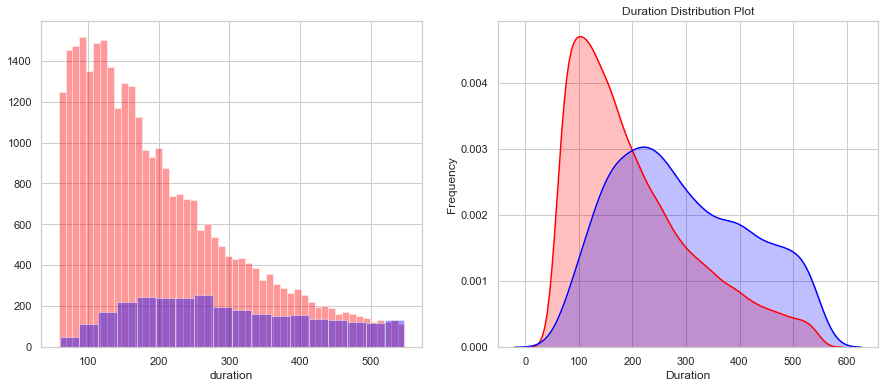

In [51]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.distplot(duration_eda[duration_eda['y']== 'no']['duration'], color='red', kde=False, ax=ax[0])
sns.distplot(duration_eda[duration_eda['y']== 'yes']['duration'], color='blue', kde=False, ax=ax[0])
plt.title('Duration Distribution Plot')
plt.xlabel('Duration')
plt.ylabel('Frequency')

sns.distplot(duration_eda[duration_eda['y']== 'no']['duration'], color='red', hist=False,kde_kws={"shade": True}, ax=ax[1])
sns.distplot(duration_eda[duration_eda['y']== 'yes']['duration'], color='blue', hist=False,kde_kws={"shade": True}, ax=ax[1])
plt.title('Duration Distribution Plot')
plt.xlabel('Duration')
plt.ylabel('Frequency')


plt.show()

- Durasi komunikasi dibawah 100 detik merupakan range durasi dengan paling customer yang tidak membuka deposit.

- Durasi komunikasi 3-5 Menit, merupakan range durasi dengan paling banyak customer yang membuka deposit. 

## Outlier Summary

### Balance

In [52]:
balance_low = df['balance'][df["balance"] < df_desc.loc["Low_Out_IQR","balance"]]
balance_high = df['balance'][df["balance"] > df_desc.loc["High_Out_IQR","balance"]]

print(f'Balance lower than {df_desc.loc["Low_Out_IQR","balance"]} or higher than {df_desc.loc["High_Out_IQR","balance"]} is an outlier. \
\nTotal amount of low outlier is {len(balance_low)} values\nTotal amount of high outlier is {len(balance_high)} values\
\nSum Amount of outlier is {len(balance_high)+len(balance_low)} values')

Balance lower than -1940.5 or higher than 3423.5 is an outlier. 
Total amount of low outlier is 19 values
Total amount of high outlier is 4526 values
Sum Amount of outlier is 4545 values


### Duration

In [53]:
duration_low = df['duration'][df["duration"] < df_desc.loc["Low_Out_IQR","duration"]]
duration_high = df['duration'][df["duration"] > df_desc.loc["High_Out_IQR","duration"]]

print(f'Duration lower than {df_desc.loc["Low_Out_IQR","duration"]} or higher than {df_desc.loc["High_Out_IQR","duration"]} is an outlier. \
\nTotal amount of low outlier is {len(duration_low)} values\nTotal amount of high outlier is {len(duration_high)} values\
\nSum Amount of outlier is {len(duration_high)+len(duration_low)} values')

Duration lower than -219.5 or higher than 640.5 is an outlier. 
Total amount of low outlier is 0 values
Total amount of high outlier is 3124 values
Sum Amount of outlier is 3124 values


### Campaign

In [54]:
campaign_low = df['campaign'][df["campaign"] < df_desc.loc["Low_Out_IQR","campaign"]]
campaign_high = df['campaign'][df["campaign"] > df_desc.loc["High_Out_IQR","campaign"]]

print(f'Campaign lower than {df_desc.loc["Low_Out_IQR","campaign"]} or higher than {df_desc.loc["High_Out_IQR","campaign"]} is an outlier. \
\nTotal amount of low outlier is {len(campaign_low)} values\nTotal amount of high outlier is {len(campaign_high)} values\
\nSum Amount of outlier is {len(campaign_high)+len(campaign_low)} values')

Campaign lower than -2.0 or higher than 6.0 is an outlier. 
Total amount of low outlier is 0 values
Total amount of high outlier is 2900 values
Sum Amount of outlier is 2900 values


### Previous

In [55]:
# Recheck lagi Previous.

previous_low = df['previous'][df["previous"] < df_desc.loc["Low_Out_IQR","previous"]]
previous_high = df['previous'][df["previous"] > df_desc.loc["High_Out_IQR","previous"]]

print(f'Previous lower than {df_desc.loc["Low_Out_IQR","previous"]} or higher than {df_desc.loc["High_Out_IQR","previous"]} is an outlier. \
\nTotal amount of low outlier is {len(previous_low)} values\nTotal amount of high outlier is {len(previous_high)} values\
\nSum Amount of outlier is {len(previous_high)+len(previous_low)} values')

Previous lower than 0.0 or higher than 0.0 is an outlier. 
Total amount of low outlier is 0 values
Total amount of high outlier is 7912 values
Sum Amount of outlier is 7912 values


### Transfer File

In [56]:
df.head(5)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,y,age_group,pdays_group,Open_Deposit,Deposit
0,management,married,tertiary,no,2143,yes,no,cellular,5,may,261,1,0,no,55-64,Not Previously Contacted,no,0
1,technician,single,secondary,no,29,yes,no,cellular,5,may,151,1,0,no,35-44,Not Previously Contacted,no,0
2,entrepreneur,married,secondary,no,2,yes,yes,cellular,5,may,76,1,0,no,25-34,Not Previously Contacted,no,0
3,management,married,tertiary,no,231,yes,no,cellular,5,may,139,1,0,no,35-44,Not Previously Contacted,no,0
4,management,single,tertiary,no,447,yes,yes,cellular,5,may,217,1,0,no,25-34,Not Previously Contacted,no,0


In [57]:
df = df.drop(columns=['y','Open_Deposit'])


In [58]:
df.to_csv('Bank_Modelling.csv', index=False)